In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
df

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,نعم,البكالوريوس,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,نعم,البكالوريوس,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,نعم,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,لا,البكالوريوس,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,أنثى,منطقة الرياض,الرياض,4f8c696a-b783-4d40-9776-105f6d3bd624,CAUF,SWPS,NaN,NaN,...,نعم,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.40,5.0,NaN,NaN,NaN,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,أنثى,منطقة القصيم,بريدة,e94942dd-8684-4746-97ae-df567b9b0a4a,PCRF,PCRF,NaN,مبتدئ,...,نعم,البكالوريوس,علوم الحاسب,NaN,4.46,5.0,موظف,NaN,NaN,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,أنثى,منطقة الرياض,الرياض,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,PCRF,تقليدية,مبتدئ,...,لا,البكالوريوس,نظم المعلومات,تكنولوجيا الاتصالات والمعلومات,4.93,5.0,موظف,دوام كامل,Yes,1
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,ذكر,منطقة الرياض,الرياض,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,PCRF,PCRF,NaN,متوسط,...,نعم,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.00,4.0,غير موظف,تدريب,No,0


In [62]:
df.describe()

,Age,Program Days,University Degree Score,University Degree Score System,Y
count,6456.000000,6548.000000,6467.000000,6467.000000,6548.000000
mean,26.831165,19.691662,8.224432,9.773929,0.158674
std,5.535967,32.112061,19.120384,21.259962,0.365400
min,18.000000,3.000000,0.000000,4.000000,0.000000
25%,23.000000,5.000000,3.300000,5.000000,0.000000
50%,25.000000,12.000000,4.000000,5.000000,0.000000
75%,29.000000,19.000000,4.510000,5.000000,0.000000
max,57.000000,292.000000,100.000000,100.000000,1.000000


In [63]:
nullValues = df.isnull().sum()
print(nullValues)

Student ID                           0
Age                                 92
Gender                               0
Home Region                          2
Home City                            2
Program ID                           0
Program Main Category Code           0
Program Sub Category Code          935
Technology Type                   2982
Program Skill Level               1646
Program Presentation Method          0
Program Start Date                   0
Program End Date                     0
Program Days                         0
Completed Degree                     0
Level of Education                  26
Education Speaciality              277
College                           3890
University Degree Score             81
University Degree Score System      81
Employment Status                  566
Job Type                          4567
Still Working                     4567
Y                                    0
dtype: int64


In [64]:
columnToDrob =['Program Sub Category Code','Technology Type', 'Program Skill Level', 'College','Job Type','Still Working']
df_cleaned = df.drop(columns=columnToDrob, axis=1)
df_cleaned

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Presentation Method,Program Start Date,Program End Date,Program Days,Completed Degree,Level of Education,Education Speaciality,University Degree Score,University Degree Score System,Employment Status,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,حضوري,2023-05-28,2023-06-08,12,نعم,البكالوريوس,هندسة حاسب الالي,2.44,4.0,غير موظف,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,حضوري,2023-04-02,2023-04-06,5,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,5.00,5.0,طالب,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,حضوري,2023-07-23,2023-09-14,54,نعم,البكالوريوس,Information Technology,3.50,5.0,موظف,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,حضوري,2023-07-23,2023-08-24,33,نعم,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),3.55,5.0,خريج,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,حضوري,2023-04-30,2023-06-22,54,لا,البكالوريوس,نظم المعلومات الحاسوبية,4.00,5.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,أنثى,منطقة الرياض,الرياض,4f8c696a-b783-4d40-9776-105f6d3bd624,CAUF,حضوري,2023-04-02,2023-06-06,66,نعم,البكالوريوس,تقنية المعلومات,4.40,5.0,NaN,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,أنثى,منطقة القصيم,بريدة,e94942dd-8684-4746-97ae-df567b9b0a4a,PCRF,عن بعد,2023-05-14,2023-05-25,12,نعم,البكالوريوس,علوم الحاسب,4.46,5.0,موظف,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,أنثى,منطقة الرياض,الرياض,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,PCRF,حضوري,2023-07-16,2023-07-20,5,لا,البكالوريوس,نظم المعلومات,4.93,5.0,موظف,1
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,ذكر,منطقة الرياض,الرياض,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,PCRF,حضوري,2024-01-07,2024-01-18,12,نعم,البكالوريوس,تقنية المعلومات,4.00,4.0,غير موظف,0


In [65]:
print(df_cleaned.isnull().sum())

Student ID                          0
Age                                92
Gender                              0
Home Region                         2
Home City                           2
Program ID                          0
Program Main Category Code          0
Program Presentation Method         0
Program Start Date                  0
Program End Date                    0
Program Days                        0
Completed Degree                    0
Level of Education                 26
Education Speaciality             277
University Degree Score            81
University Degree Score System     81
Employment Status                 566
Y                                   0
dtype: int64


In [66]:
age_median = df_cleaned['Age'].median()
df_cleaned['Age'] = df_cleaned['Age'].fillna(age_median)

df_cleaned.dropna(subset=['Level of Education'], inplace=True)


In [67]:
print(df_cleaned.isnull().sum())

Student ID                          0
Age                                 0
Gender                              0
Home Region                         1
Home City                           1
Program ID                          0
Program Main Category Code          0
Program Presentation Method         0
Program Start Date                  0
Program End Date                    0
Program Days                        0
Completed Degree                    0
Level of Education                  0
Education Speaciality             251
University Degree Score            55
University Degree Score System     55
Employment Status                 540
Y                                   0
dtype: int64


In [68]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned['Education Speaciality'] = mode_imputer.fit_transform(df_cleaned[['Education Speaciality']])

median_imputer = SimpleImputer(strategy='median')
df_cleaned['University Degree Score'] = median_imputer.fit_transform(df_cleaned[['University Degree Score']])
df_cleaned['University Degree Score System'] = median_imputer.fit_transform(df_cleaned[['University Degree Score System']])


In [69]:
def impute_employment_status(row):
    if pd.isnull(row['Employment Status']):
        if row['Age'] < 23:
            return 'طالب'
        else:
            if row['University Degree Score System'] == 5 and row['University Degree Score'] >= 4:
                return 'موظف'
            elif row['University Degree Score System'] == 4 and row['University Degree Score'] >= 3:
                return 'موظف'
            else:
                return 'غير موظف'
    else:
        return row['Employment Status']

df_cleaned['Employment Status'] = df_cleaned.apply(impute_employment_status, axis=1)

df_cleaned.dropna(subset=['Home City', 'Home Region'], inplace=True)


In [70]:
print(df_cleaned.isnull().sum())

Student ID                        0
Age                               0
Gender                            0
Home Region                       0
Home City                         0
Program ID                        0
Program Main Category Code        0
Program Presentation Method       0
Program Start Date                0
Program End Date                  0
Program Days                      0
Completed Degree                  0
Level of Education                0
Education Speaciality             0
University Degree Score           0
University Degree Score System    0
Employment Status                 0
Y                                 0
dtype: int64


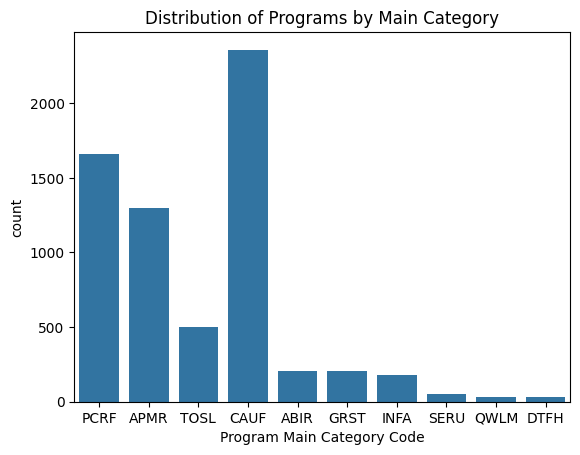

In [71]:
sns.countplot(x='Program Main Category Code', data=df_cleaned)
plt.title('Distribution of Programs by Main Category')
plt.show()

In [72]:
categorical_columns = [ 'Gender', 'Home Region', 'Home City',
       'Program Main Category Code', 'Program Presentation Method',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'University Degree Score', 'University Degree Score System',
       'Employment Status',]

# Iterate through each categorical column and one-hot encode
for col in categorical_columns:
    one_hot = pd.get_dummies(df_cleaned[col], prefix=col)
    df_cleaned = pd.concat([df_cleaned, one_hot], axis=1)
    df_cleaned.drop(col, axis=1, inplace=True)
df_cleaned

,Student ID,Age,Program ID,Program Start Date,Program End Date,Program Days,Y,Gender_أنثى,Gender_ذكر,Home Region_المنطقة الشرقية,...,University Degree Score_100.0,University Degree Score System_4.0,University Degree Score System_5.0,University Degree Score System_100.0,Employment Status_خريج,Employment Status_طالب,Employment Status_عمل حر,Employment Status_غير موظف,Employment Status_موظف,Employment Status_موظف - طالب
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,453686d8-4023-4506-b2df-fac8b059ac26,2023-05-28,2023-06-08,12,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,2023-04-02,2023-04-06,5,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,2023-07-23,2023-09-14,54,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,2023-07-23,2023-08-24,33,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,d32da0e9-1aed-48c3-992d-a22f9ccc741e,2023-04-30,2023-06-22,54,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,cd196579-9590-441b-8787-41078f3cee25,31.0,4f8c696a-b783-4d40-9776-105f6d3bd624,2023-04-02,2023-06-06,66,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6544,37bfc11c-ff8c-42dc-9cf9-0d13bb8f7131,27.0,e94942dd-8684-4746-97ae-df567b9b0a4a,2023-05-14,2023-05-25,12,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6545,fc114302-a79f-439f-a08b-fe0a51cf839e,24.0,02ae0b47-64a6-47a1-b3c5-c0e4df393c30,2023-07-16,2023-07-20,5,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6546,4b6d9a36-4402-4c75-bc3a-fca927dbaf65,25.0,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,2024-01-07,2024-01-18,12,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [73]:
columnToDrob =['Program ID','Student ID','Program Start Date','Program End Date']
df_cleaned = df_cleaned.drop(columns=columnToDrob, axis=1)
df_cleaned

,Age,Program Days,Y,Gender_أنثى,Gender_ذكر,Home Region_المنطقة الشرقية,Home Region_منطقة الباحة,Home Region_منطقة الجوف,Home Region_منطقة الحدود الشمالية,Home Region_منطقة الرياض,...,University Degree Score_100.0,University Degree Score System_4.0,University Degree Score System_5.0,University Degree Score System_100.0,Employment Status_خريج,Employment Status_طالب,Employment Status_عمل حر,Employment Status_غير موظف,Employment Status_موظف,Employment Status_موظف - طالب
0,37.0,12,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,21.0,5,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,24.0,54,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,23.0,33,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,23.0,54,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,31.0,66,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6544,27.0,12,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6545,24.0,5,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6546,25.0,12,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_cleaned.drop('Y', axis=1)
y = df_cleaned['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")



Model Accuracy: 0.8666666666666667


In [76]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1}")

F1 Score: 0.5056818181818181


In [90]:
submission = pd.DataFrame(columns = ['ID','Y'])
submission['ID'] = list(range(1,test.shape[0]+1))
y_pred = y_pred.argmax(axis=-1)
submission['Y'] = y_pred

In [91]:
submission.head()

,ID,Y
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
